In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [6]:
#50000(train data) 32-32(x-y ekseni 32 pixel) 3(rgb)
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:

y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [9]:
#
y_test = y_test.reshape(-1,)


In [10]:
y_test 

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
resim_siniflari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(resim_siniflari[y[index]])
    plt.show()


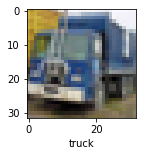

In [33]:
plot_sample(X_test, y_test, 14)

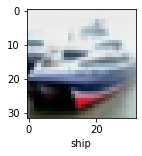

In [14]:
plot_sample(X_test, y_test, 1)

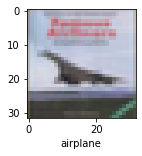

In [15]:
plot_sample(X_test, y_test, 3)

In [16]:
#normalizasyon 
X_train = X_train / 255
X_test = X_test / 255

In [17]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4758 - accuracy: 0.4677
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1233 - accuracy: 0.6057
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0086 - accuracy: 0.6486
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9367 - accuracy: 0.6755
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8783 - accuracy: 0.6960


In [20]:
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9530 - accuracy: 0.6689


[0.9530162811279297, 0.6689000129699707]

In [21]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[1.2158465e-03, 1.4201718e-04, 4.0666959e-03, 6.5313983e-01,
        4.6567529e-04, 1.6683213e-01, 7.8495154e-03, 1.5709229e-04,
        1.6458912e-01, 1.5420091e-03],
       [3.3672580e-03, 2.0146895e-02, 4.5133937e-05, 1.1656992e-05,
        3.5319381e-06, 1.1861737e-06, 1.9337945e-06, 9.2799382e-06,
        9.7246677e-01, 3.9464138e-03],
       [4.6509478e-02, 5.6969129e-02, 3.1043494e-03, 1.1521338e-02,
        3.2158110e-03, 1.1622120e-03, 2.1181747e-04, 3.1057028e-03,
        8.3413309e-01, 4.0067092e-02]], dtype=float32)

In [22]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]

[3, 8, 8]

In [23]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

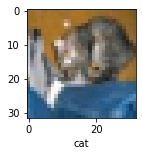

In [24]:
plot_sample(X_test, y_test,0)

In [25]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

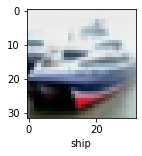

In [26]:
plot_sample(X_test, y_test,1)

In [27]:
resim_siniflari[y_predictions_siniflari[1]]

'ship'

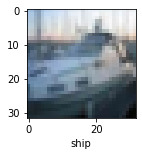

In [28]:
plot_sample(X_test, y_test,2)

In [29]:
resim_siniflari[y_predictions_siniflari[2]]

'ship'